<a href="https://colab.research.google.com/github/shehry6/matplotlib-bar-plot/blob/main/MULTI_LAYER_PERCEPTRON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
#MULTI LAYER PERCEPTRON

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [14]:
#load the tips dataset
df = sns.load_dataset('tips')

In [15]:
df.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [16]:
df.isnull().sum()

,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


In [17]:
#one hot encoding
df = pd.get_dummies(df,columns =['sex','smoker','day','time'],drop_first=True ,sparse=True,dtype=int)

In [18]:
df.head(3)

,total_bill,tip,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,1.01,2,1,1,0,0,1,1
1,10.34,1.66,3,0,1,0,0,1,1
2,21.01,3.50,3,0,1,0,0,1,1


In [19]:
#selecting features and target
X = df.drop('tip',axis=1)
y = df['tip']

In [21]:
X.shape

(244, 8)

In [22]:
#splitting the dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [23]:
X_train.shape

(195, 8)

In [24]:
#standerdizing the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [26]:
X_train.shape

(195, 8)

In [28]:
#building the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64,activation='relu',input_shape=(X_train.shape[1],)),  #input layer
    tf.keras.layers.Dense(32,activation='relu'),   #hidden layer
    tf.keras.layers.Dense(1)              #output layer for regression
])

In [29]:
#compile the model
model.compile(optimizer='adam',loss='mse',metrics=['mae'])

In [30]:
#training the model
history = model.fit(X_train,y_train,epochs=100,batch_size=32,verbose=1)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 11.6065 - mae: 3.0668
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.1234 - mae: 2.5028 
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.8501 - mae: 2.1534 
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.2119 - mae: 1.8014 
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.1284 - mae: 1.4912 
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.5503 - mae: 1.1434 
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.0713 - mae: 1.0548 
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.6407 - mae: 0.9639 
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5421 - mae: 0.9563 
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3634 - mae: 0.9234 
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2566 - mae: 0.8719 
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3058 - mae: 0.8666 
Epoch 13/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

In [31]:
#evaluating the model
loss,mae = model.evaluate(X_test,y_test)
print(f'Mean Absolute Error: {mae}')
print(f'Loss: {loss}')


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.2938 - mae: 0.8382 
Mean Absolute Error: 0.7892450094223022
Loss: 1.1505117416381836


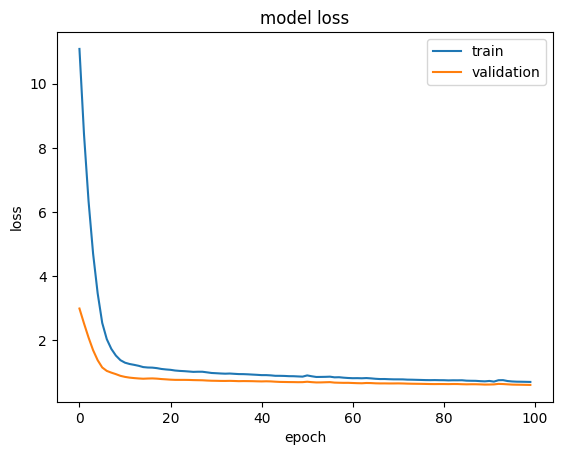

In [35]:
#ploting the training and test data
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['mae'],label='train mae')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc = 'upper right')
plt.show()